In [1]:
# import lib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 
# 임포트 관련 기능들을 자유롭게 사용할 수 있음.
# importlib.metadata: 설치된 패키지 메다 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

from importlib.metadata import version
import cv2
import pixellib

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


In [2]:
import os 
import urllib
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

# 인물모드 직접 해 보기

## 인물 사진 아웃포커싱 적용

(2944, 2208, 3)


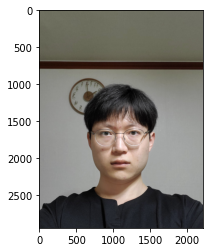

In [3]:
img_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/front.jpg'
img_orig = cv2.imread(img_path)
print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
img_orig.shape

(2944, 2208, 3)

In [5]:
model_dir = os.getenv('HOME') + '/aiffel/human_segmentation/models'

model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f394503dd90>)

In [6]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [7]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [8]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

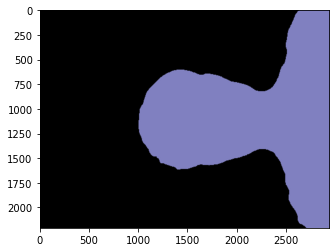

In [9]:
plt.imshow(output)
plt.show()

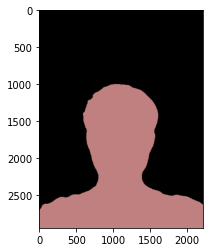

In [10]:
output = cv2.rotate(output, cv2.ROTATE_90_CLOCKWISE).copy()
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [12]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [13]:
# 컬러맵 만들기
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [14]:
colormap[15]

array([192, 128, 128])

In [15]:
seg_color = (128, 128, 192)

(2944, 2208)


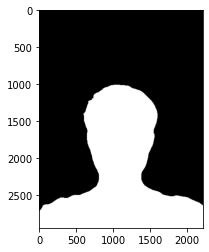

In [16]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

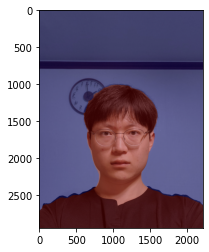

In [17]:
img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

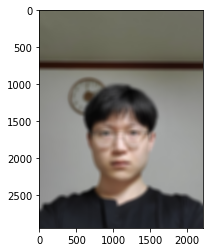

In [18]:
img_orig_blur = cv2.blur(img_orig, (60, 60))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

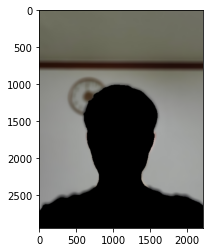

In [19]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

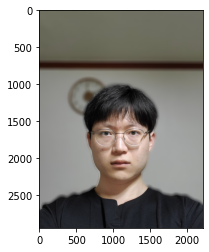

In [20]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 동물 사진 아웃포커싱 적용

(546, 728, 3)


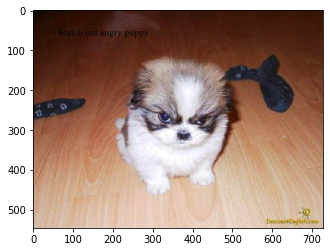

In [21]:
img_path_p = os.getenv('HOME') + '/aiffel/human_segmentation/images/angry_puppy.jpg'
img_orig_p = cv2.imread(img_path_p)
print(img_orig_p.shape)
plt.imshow(cv2.cvtColor(img_orig_p, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
model_p = semantic_segmentation()
model_p.load_pascalvoc_model(model_file)

segvalues_p, output_p = model_p.segmentAsPascalvoc(img_path_p)

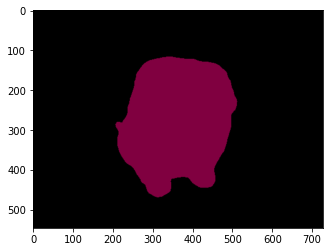

In [24]:
plt.imshow(output_p)
plt.show()

In [25]:
segvalues_p

{'class_ids': array([ 0, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [26]:
for class_id in segvalues_p['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [27]:
colormap_p = np.zeros((256, 3), dtype=int)
ind_p = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap_p[:, channel] |= ((ind_p >> channel) & 1) << shift
    ind >>= 3
    
colormap_p[:20]

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [255, 255,   0],
       [  0,   0, 255],
       [255,   0, 255],
       [  0, 255, 255],
       [255, 255, 255],
       [  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [255, 255,   0],
       [  0,   0, 255],
       [255,   0, 255],
       [  0, 255, 255],
       [255, 255, 255],
       [  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [255, 255,   0]])

In [28]:
colormap_p[12]

array([  0,   0, 255])

In [29]:
seg_color_p = (128, 0, 64)

(546, 728)


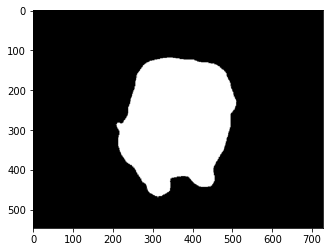

In [30]:
seg_map_p = np.all(output_p==seg_color_p, axis=-1)
print(seg_map_p.shape)
plt.imshow(seg_map_p, cmap='gray')
plt.show()

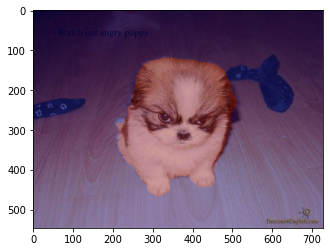

In [31]:
img_show_p = img_orig_p.copy()
img_mask_p = seg_map_p.astype(np.uint8) * 255
color_mask_p = cv2.applyColorMap(img_mask_p, cv2.COLORMAP_JET)
img_show_p = cv2.addWeighted(img_show_p, 0.6, color_mask_p, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_p, cv2.COLOR_BGR2RGB))
plt.show()

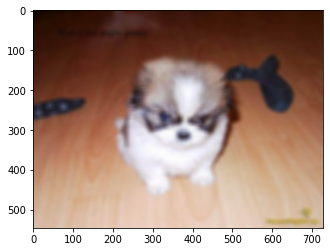

In [32]:
img_orig_blur_p = cv2.blur(img_orig_p, (13, 13))

plt.imshow(cv2.cvtColor(img_orig_blur_p, cv2.COLOR_BGR2RGB))
plt.show()

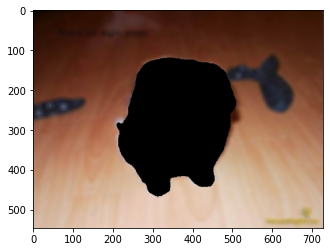

In [33]:
img_mask_color_p = cv2.cvtColor(img_mask_p, cv2.COLOR_GRAY2BGR)

img_bg_mask_p = cv2.bitwise_not(img_mask_color_p)

img_bg_blur_p = cv2.bitwise_and(img_orig_blur_p, img_bg_mask_p)
plt.imshow(cv2.cvtColor(img_bg_blur_p, cv2.COLOR_BGR2RGB))
plt.show()

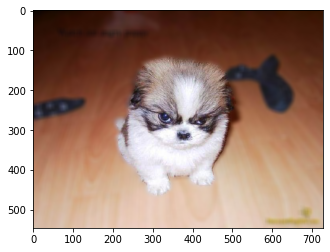

In [34]:
img_concat_p = np.where(img_mask_color_p==255, img_orig_p, img_bg_blur_p)
plt.imshow(cv2.cvtColor(img_concat_p, cv2.COLOR_BGR2RGB))
plt.show()

## 크로마키 적용

(183, 275, 3)


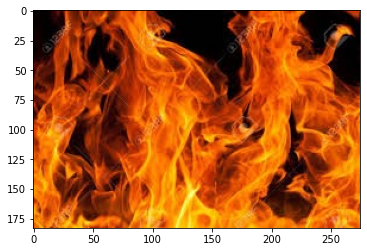

In [35]:
img_path_f  = os.getenv('HOME') + '/aiffel/human_segmentation/images/fire.jpg'
img_orig_f = cv2.imread(img_path_f)
print(img_orig_f.shape)
plt.imshow(cv2.cvtColor(img_orig_f, cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
img_bg_f = cv2.resize(img_orig_f, (728, 546))

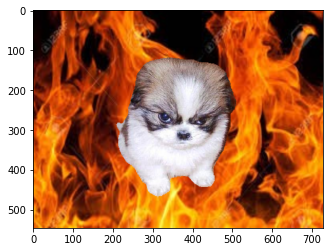

In [37]:
img_concat_pf = np.where(img_mask_color_p==255, img_orig_p, img_bg_f)
plt.imshow(cv2.cvtColor(img_concat_pf, cv2.COLOR_BGR2RGB))
plt.show()

(360, 538, 3)


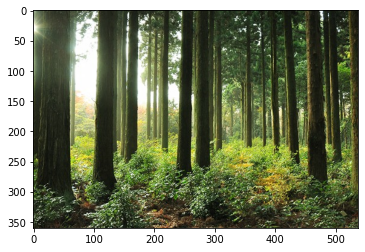

(2944, 2208, 3)

In [64]:
img_path_f  = os.getenv('HOME') + '/aiffel/human_segmentation/images/forest.jpg'
img_orig_f = cv2.imread(img_path_f)
print(img_orig_f.shape)
plt.imshow(cv2.cvtColor(img_orig_f, cv2.COLOR_BGR2RGB))
plt.show()
img_bg_f = cv2.resize(img_orig_f, (2208, 2944))
img_bg_f.shape

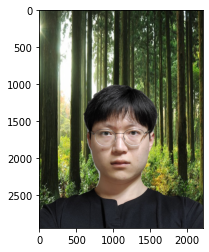

In [66]:
img_concat_pf = np.where(img_mask_color==255, img_orig, img_bg_f)
plt.imshow(cv2.cvtColor(img_concat_pf, cv2.COLOR_BGR2RGB))
plt.show()

## 사진에서 문제점 찾기.

(2944, 2208, 3)


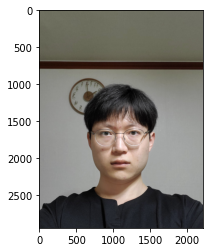

In [38]:
img_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/front.jpg'
img_orig = cv2.imread(img_path)
print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

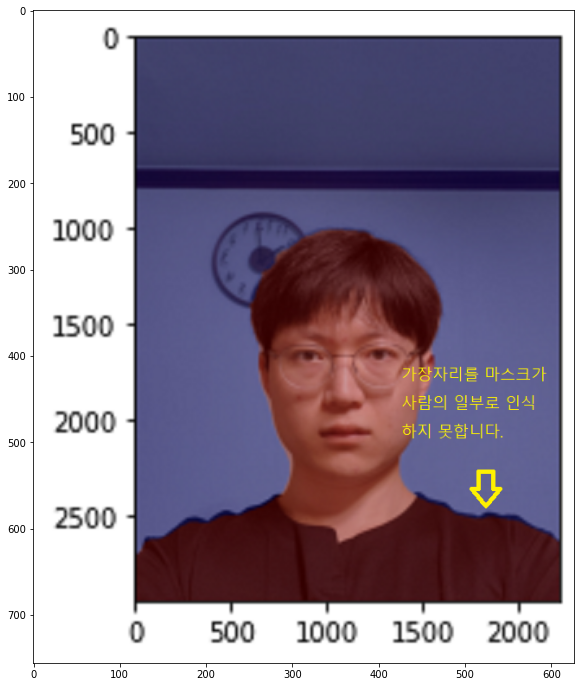

In [39]:
error_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/img_error1.png'
error1 = cv2.imread(error_path)
plt.figure(figsize=(40, 12))
plt.imshow(cv2.cvtColor(error1, cv2.COLOR_BGR2RGB))
plt.show()

## 해결 방법 제안하기

위 문제는 사진에서 사람을 인식할때 사람이미지의 외곽선을 인식하는데에 조금 어려움이 있어서 생긴것 같습니다.  
해서 제 생각에는 Edge Detection 기술을 사용하여 사진의 외곽선을 표시하고,  segmentation으로 분리한 사람이미지의 외곽선위치의 색상값과 Edge detection 으로 표시한 외곽선 위치의 색상값이 서로 비슷한 색상이면 Edge detection으로 찾아낸 외곽선 위치까지 mask의 범위를 연장시킨다면 어느 정도 해결할 수 있을 것 같습니다.

밑은 예시로 가져온 Edge Detection 중 하나인 canny로 외곽선을 표시해 놓은 것입니다. 기존 사진의 segmentation으로 외곽선을 딴것 보다는 조금 더 바깥쪽으로 외곽선을 표시하고 있는것이 보입니다.

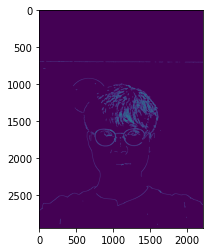

In [55]:
canny = cv2.Canny(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB), 60, 200)
plt.imshow(canny)
plt.show()

# 회고

* semantic segmentation을 이용해서 인물사진이나 동물사진의 아웃포커싱과 배경을 바꾸는 것들을 해보았습니다.
* 이번 프로젝트는 semantic segmentation에서의 문제점을 고치기위해 해결방안을 제시하는 부분이 어려웠습니다. 관련지식이 아직 부족하고, 해당 모델의 깊이있는 이해가 아직은 부족하여 명확한 해결방안을 찾아내는게 쉽지않기 때문입니다.  
* image segmentation 부분은 cv에서 다양한 곳에서 사용되고, 기본이 되는 중요한것이라고 생각되기 때문에, 따로 관련 자료들을 찾아서 봐둬야 할 것 같습니다.